# 손글씨 분류 - load_digits

## 데이터 분석

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [22]:
# feature data
digits_data = digits.data
print(digits_data.shape)
digits_data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

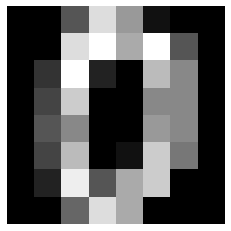

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits_data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

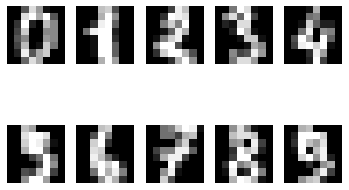

In [12]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [58]:
# target data
digits_label = digits.target
print(digits_label.shape)
print(digits_label[:20])


(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [60]:
df_digits = load_digits(as_frame=True)
df_digits.target.value_counts(sort=False)

# balanced한 데이터다.

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

In [24]:
# dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [25]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [27]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

## 1. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


decision_tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[29  0  0  0  3  1  0  0  0  0]
 [ 0 22  1  1  2  0  0  0  1  1]
 [ 0  0 26  3  1  0  1  1  1  0]
 [ 0  0  0 29  0  1  0  1  1  2]
 [ 0  0  0  0 42  0  1  3  0  0]
 [ 0  0  1  1  1 44  0  0  0  0]
 [ 0  0  0  0  2  0 33  0  0  0]
 [ 0  0  0  3  1  0  0 30  0  0]
 [ 0  2  0  2  1  1  0  0 21  3]
 [ 0  1  0  2  1  1  0  1  1 33]]


In [63]:
print(accuracy_score(y_test, y_pred))

0.8583333333333333


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.88      0.79      0.83        28
           2       0.93      0.79      0.85        33
           3       0.71      0.85      0.77        34
           4       0.78      0.91      0.84        46
           5       0.92      0.94      0.93        47
           6       0.94      0.94      0.94        35
           7       0.83      0.88      0.86        34
           8       0.84      0.70      0.76        30
           9       0.85      0.82      0.84        40

    accuracy                           0.86       360
   macro avg       0.87      0.85      0.86       360
weighted avg       0.87      0.86      0.86       360



load_digits의 label 데이터 분포가 balanced하며, False Negative 혹은 False Positive 모두 예민하게 볼 주제의 데이터가 아니다. 때문에 `accuracy`나 `F1-score`로 평가해도 문제는 없다.   
실제로 `accuracy`와 `F1-score` 모두 0.86이 나왔으며, 숫자 3과 8에서 다른 숫자들에 비해 오답을 낸 경우가 살짝 보인다.

## 2. Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  1  1  0  0  0 38]]


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



`accuracy`와 `F1-score` 모두 0.97, 0.98이 나왔으며, 전반적으로 